In [3]:
%matplotlib inline

import os
# needed to add for some weird jupyter notebook thing
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from numpy.random import default_rng

### Setting seeds for repeatability

In [4]:
random.seed(0)
torch.manual_seed(0)
np.random.seed(0)
torch.cuda.manual_seed_all(0)

device = torch.device("cpu")

### Defining model and extracting kernels

In [5]:
net = models.resnet50(pretrained=True)

In [6]:
all_layers = []

# Filter out all the layers with no weights
for module in list(net.modules()):
    module_type = type(module)
    if module_type not in {nn.Sequential, models.resnet.ResNet, nn.ReLU, nn.BatchNorm2d, 
                           models.resnet.Bottleneck, nn.MaxPool2d, nn.AdaptiveAvgPool2d, 
                           nn.modules.pooling.AvgPool2d}:
        all_layers.append(module)
        print(module.weight.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64, 64, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([64, 256, 1, 1])
torch.Size([64, 64, 3, 3])
torch.Size([256, 64, 1, 1])
torch.Size([128, 256, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([512, 256, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([128, 512, 1, 1])
torch.Size([128, 128, 3, 3])
torch.Size([512, 128, 1, 1])
torch.Size([256, 512, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([1024, 512, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1, 1])
torch.Size([256, 256, 3, 3])
torch.Size([1024, 256, 1, 1])
torch.Size([256, 1024, 1,

In [7]:
# normalize image (just for matplotlib viewing purposes below)
def norm(img):
    img_min = np.min(img)
    img_max = np.max(img)
    return (img - img_min) / (img_max - img_min)

15


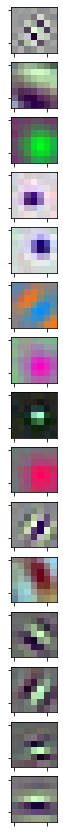

In [16]:
# only sampling some kernels per layer bc there are tens of thousands of kernels in some layers
num_kernels_to_sample = 15

# change this index to get different layer index (0 = first layer)
# other layers will not be able to show this 3-channel view 
# (this first layer is nice bc its kernels have 3 channels which correspond nicely to RGB)
# so to visualize other layers, sample the channels as well, and show 1-channel kernels
layer = all_layers[0].weight.detach().numpy()

out_channels = layer.shape[0]
in_channels = 1

fig, axs = plt.subplots(num_kernels_to_sample,in_channels)
fig.set_size_inches(in_channels, num_kernels_to_sample)

rng = default_rng()
random_kernel_i = rng.choice(out_channels, size=num_kernels_to_sample, replace=False)
random_kernels = layer[random_kernel_i]

for i in range(num_kernels_to_sample):
    # 
    kernel = random_kernels[i].swapaxes(0, 2).swapaxes(0, 1)
    if kernel.shape[2] > 3:
        random_channel_i = rng.choice(kernel.shape[2])
        kernel = kernel[:, :, random_channel_i]
    axs[i].imshow(norm(kernel))

    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

plt.show()